# OSMNX

## Introducción

OSMnx es una librería de Python que permite descargar, analizar y visualizar redes de calles y otras geometrías urbanas directamente desde OpenStreetMap (OSM). A través de sus métodos, es posible obtener redes de calles, encontrar rutas óptimas, calcular métricas espaciales y visualizar datos geográficos de manera eficiente.

Este notebook funciona como una guía práctica sobre el uso de OSMnx, a lo largo de este documento, exploraremos los métodos principales de la librería, explicando su funcionamiento teórico y aplicándolos con algunos ejemplos de código ejecutable.

## Dependencias

In [1]:
# Instalar GeoPandas: para manejar datos geoespaciales como tablas con geometrías
!pip install geopandas

# Instalar Shapely: para crear y manipular formas geométricas (puntos, líneas, polígonos)
!pip install shapely

# Instalar NetworkX: para trabajar con grafos, como las redes de calles
!pip install networkx

# Instalar Matplotlib: para visualizar redes y geometrías con gráficos
!pip install matplotlib

## Descarga

In [2]:
#### Agregar más maneras de descargar segun editor
!pip install osmnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.6/99.6 kB 4.6 MB/s eta 0:00:00


Importar librerias

In [3]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

## Descargar redes de calles

Existen diversos métodos para descargar redes de calles, a continuación mostramos cuatro:


```ox.graph_from_place(place_name, network_type='all'):``` Descarga una red de calles por nombre de lugar (ciudad, región, país, etc.).

```ox.graph_from_address(address, dist=1000, network_type='all'):``` Descarga una red de calles alrededor de una dirección.

```ox.graph_from_bbox(north, south, east, west, network_type='all'):``` Descarga una red de calles dentro de un área rectangular (bbox).

```ox.graph_from_point(center_point, dist=1000, network_type='all'):``` Descarga una red de calles alrededor de un punto (latitud, longitud).

```ox.graph_from_polygon(polygon, network_type='all'):``` Descarga una red de calles dentro de un polígono.

In [4]:
print(ox.__version__)

2.0.1


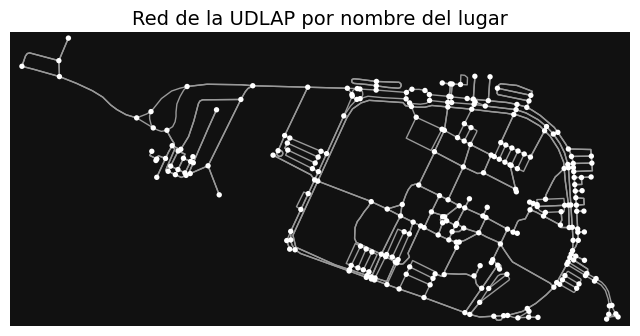

In [5]:
# Método 1: Crear el grafo a partir del nombre de un lugar
graph_place = ox.graph_from_place(
    'Universidad de las Américas Puebla, Cholula, Puebla, México',
    network_type='all'  # Se incluyen todos los tipos de vías (peatonales, vehiculares, ciclovías, etc.)
)

# Graficar el grafo con opciones personalizadas
fig, ax = ox.plot_graph(graph_place, show=False, close=False)

# Agregar un título a la figura
ax.set_title("Red de la UDLAP por nombre del lugar", fontsize=14, color="black")

# Mostrar la figura
plt.show()

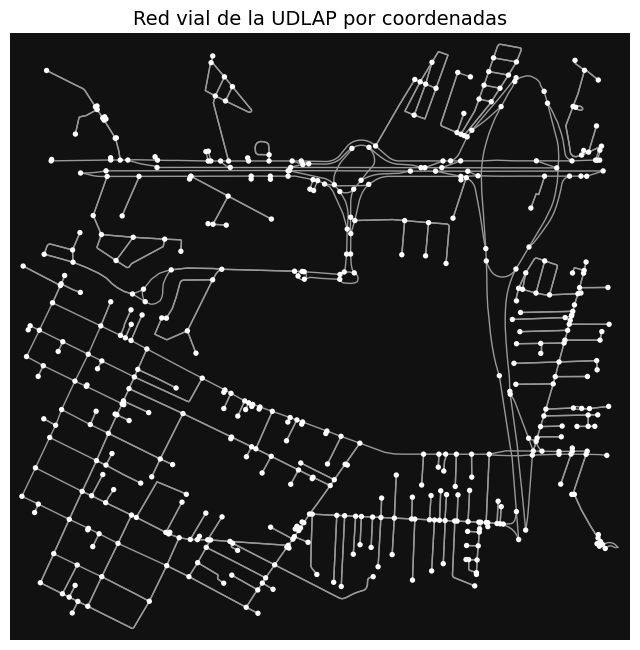

In [6]:
# Método 2: Crear el grafo a partir de coordenadas y una distancia determinada

# Coordenadas aproximadas de la Universidad de las Américas Puebla (UDLAP)
lat = 19.0544632
lon = -98.28496803209754
center_point = (lat, lon)  # Punto central del área de interés

# Obtener el grafo de la red vial en un radio de 1000 metros desde el punto central
graph_point = ox.graph_from_point(
    center_point,  # Centro del área de interés
    dist=1000,  # Radio de 1000 metros alrededor del punto
    network_type='drive'  # Solo considera calles aptas para vehículos (excluye senderos peatonales, ciclovías, etc.)
)

# Graficar el grafo con opciones personalizadas
fig, ax = ox.plot_graph(graph_point, show=False, close=False)

# Agregar un título a la figura
ax.set_title("Red vial de la UDLAP por coordenadas", fontsize=14, color="black")

# Mostrar la figura
plt.show()

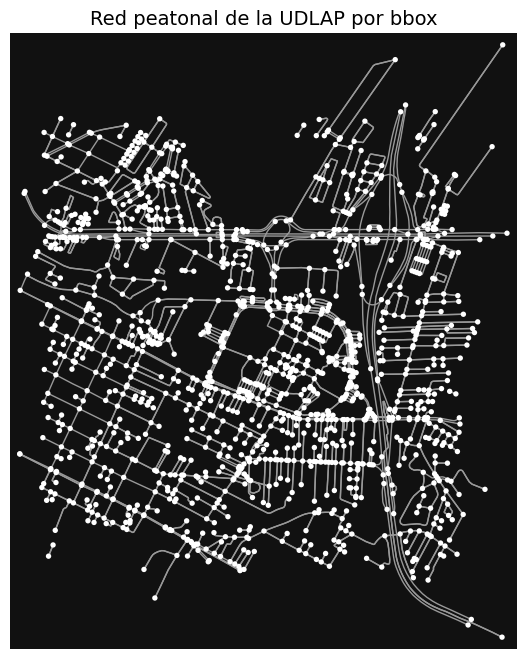

In [7]:
# Método 3: Por bounding box con detalles

# Definir un margen en grados para determinar el área del bounding box (BBox)
margin = 0.01

# Calcular los límites del bounding box sumando/restando el margen a las coordenadas del punto central
left = lon - margin  # Límite oeste (West)
bottom = lat - margin  # Límite sur (South)
right = lon + margin  # Límite este (East)
top = lat + margin  # Límite norte (North)

# Crear la tupla con los límites del bounding box
bbox = (left, bottom, right, top)

# Obtener la red vial dentro del bounding box definido
graph_bbox = ox.graph_from_bbox(
    bbox,  # Coordenadas del área de interés
    network_type='all',  # Incluye todos los tipos de vías (peatonales, ciclovías, calles, carreteras, etc.)
    simplify=True,  # Simplifica la geometría eliminando nodos innecesarios
    retain_all=True,  # Mantiene todos los componentes del grafo, incluso si están desconectados
    truncate_by_edge=True  # Recorta las aristas que cruzan el límite del BBox en lugar de eliminarlas
)

# Graficar la red vial obtenida
fig, ax = ox.plot_graph(graph_bbox, show=False, close=False)

# Agregar un título descriptivo a la gráfica
ax.set_title("Red peatonal de la UDLAP por bbox", fontsize=14, color="black")

plt.show()

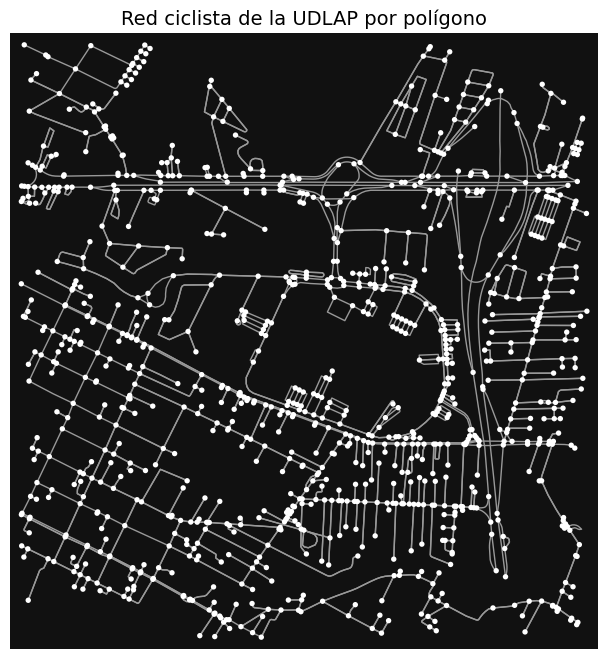

In [8]:
# Método: 4 por Polígono
from shapely.geometry import Polygon

# Definir un polígono personalizado alrededor de la UDLAP
# Cada par de coordenadas representa un vértice del polígono (lon, lat)
polygon = Polygon([
    (-98.294968, 19.044463),  # Esquina suroeste
    (-98.274968, 19.044463),  # Esquina sureste
    (-98.274968, 19.064463),  # Esquina noreste
    (-98.294968, 19.064463)   # Esquina noroeste
])

# Descargar la red de calles dentro del polígono especificado
graph_polygon = ox.graph_from_polygon(polygon, network_type='bike')  # Solo incluye vías aptas para bicicletas

# Graficar la red vial obtenida
fig, ax = ox.plot_graph(graph_polygon, show=False, close=False)

# Agregar un título descriptivo a la gráfica
ax.set_title("Red ciclista de la UDLAP por polígono", fontsize=14, color="black")

# Mostrar la figura
plt.show()


## Descargar geometrías

```ox.geometries_from_place(place_name, tags):``` Descarga geometrías (edificios, parques, etc.) por nombre de lugar.

```ox.geometries_from_address(address, tags, dist=1000):``` Descarga geometrías alrededor de una dirección.

```ox.geometries_from_bbox(north, south, east, west, tags)```: Descarga geometrías dentro de un bbox.

```ox.geometries_from_point(center_point, tags, dist=1000):``` Descarga geometrías alrededor de un punto.

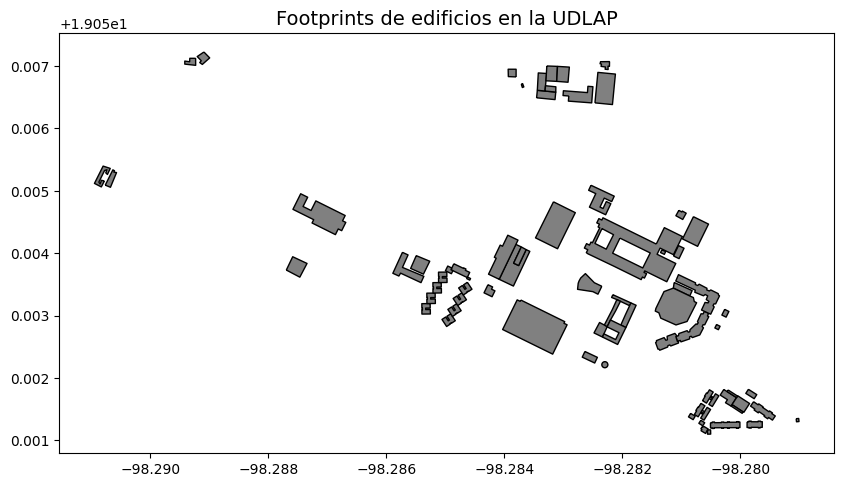

In [9]:
# Definir el lugar de interés
place_name = "Universidad de las Américas Puebla, Cholula, Puebla, México"

# Definir los tags de OpenStreetMap para filtrar solo los edificios (footprints)
tags = {"building": True}

# Obtener los footprints de los edificios dentro del área especificada
gdf_buildings = ox.features_from_place(place_name, tags)

# Crear una figura y un eje para la visualización
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar los footprints de los edificios
gdf_buildings.plot(ax=ax, facecolor="gray", edgecolor="black")

# Agregar un título descriptivo a la gráfica
ax.set_title("Footprints de edificios en la UDLAP", fontsize=14)

# Mostrar la figura con los edificios
plt.show()


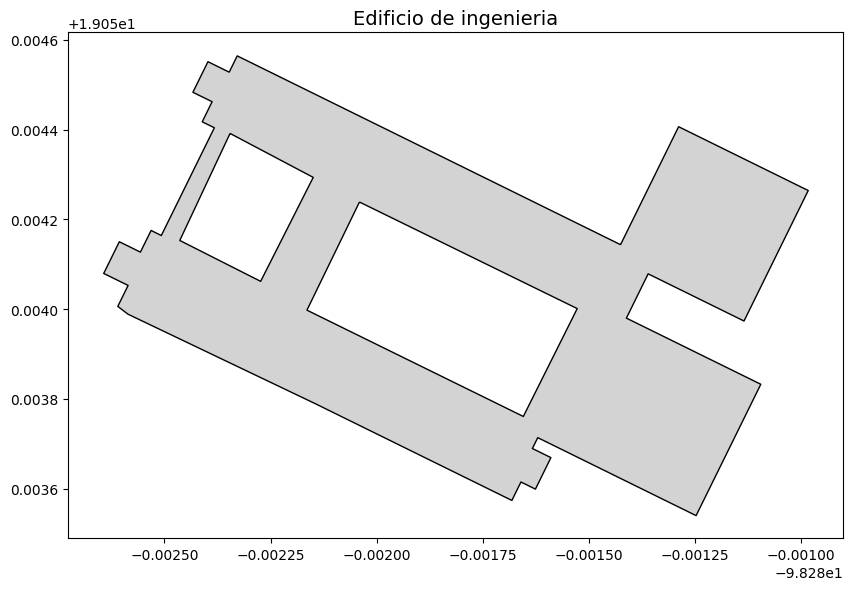

In [10]:
# Coordenadas del punto central
lat = 19.05421247805635
lon = -98.28187256082167

# Margen en grados (puedes ajustarlo según tus necesidades)
margen = 0.0001  # 0.01 grados de margen

# Calcular las coordenadas norte, sur, este y oeste
north = lat + margen
south = lat - margen
east = lon + margen
west = lon - margen


# Definir el bounding box como una tupla
bbox = (west, south, east, north)

# Etiquetas para obtener edificios, calles y parques
tags = {"building": True,"landuse": "park"}

# Obtener las características de OSM dentro del bounding box
gdf_features = ox.features.features_from_bbox(bbox, tags)

# Graficar los edificios, calles y parques
fig, ax = plt.subplots(figsize=(10, 10))
gdf_features.plot(ax=ax, facecolor="lightgray", edgecolor="black")

# Título del gráfico
ax.set_title("Edificio de ingenieria", fontsize=14)

plt.show()


## Manipulación de redes

A continuación se muestran algunos ejemplos de  métodos de manipulación de redes en Python

```ox.add_edge_speeds(graph):``` Agrega velocidades estimadas a las calles, obteniendo el dato directo de OpenStreetMap (si está disponible) o asignando el default por tipo de calle (si no está disponible en OpenStreetMap).

```ox.add_edge_travel_times(graph): ```Agrega tiempos de viaje estimados a las calles dependiendo de los valores de velocidad.


Otros metodos destacables son (no tienen ejemplo en Python en este notebok)

```ox.add_node_elevations(graph, api_key):``` Agrega datos de elevación a los nodos (requiere una API key).

```ox.simplify_graph(graph):``` Simplifica la red eliminando nodos innecesarios.

```ox.project_graph(graph):``` Proyecta la red a un sistema de coordenadas específico (por ejemplo, UTM).

In [11]:
# Agrega información de velocidad a las aristas del grafo basado en OSM
graph_speeds = ox.add_edge_speeds(graph_bbox)

# Itera sobre todas las aristas del grafo con sus datos
for u, v, k, data in graph_speeds.edges(keys=True, data=True):
    # Imprime la velocidad asignada a cada arista en km/h
    print(f"Edge ({u} → {v}) has speed {data['speed_kph']} km/h")


Edge (253266908 → 8158278520) has speed 90.0 km/h
Edge (253266908 → 8412695480) has speed 90.0 km/h
Edge (253266909 → 5034923765) has speed 40.0 km/h
Edge (253266909 → 470138594) has speed 90.0 km/h
Edge (253266919 → 7131453032) has speed 47.05882352941177 km/h
Edge (253266919 → 7131526862) has speed 47.05882352941177 km/h
Edge (253266919 → 8856782449) has speed 47.05882352941177 km/h
Edge (253266919 → 8856782446) has speed 47.05882352941177 km/h
Edge (253266924 → 8155661501) has speed 90.0 km/h
Edge (253266924 → 253266926) has speed 50.0 km/h
Edge (253266926 → 8475295083) has speed 50.0 km/h
Edge (253266926 → 8155661501) has speed 50.0 km/h
Edge (253266931 → 8456831482) has speed 30.0 km/h
Edge (253266931 → 8496084708) has speed 30.0 km/h
Edge (253266931 → 7578438961) has speed 50.0 km/h
Edge (253266983 → 8158506826) has speed 90.0 km/h
Edge (291795227 → 291795393) has speed 90.0 km/h
Edge (291795353 → 8835079200) has speed 29.384615384615383 km/h
Edge (291795353 → 3147531587) has spe

In [12]:
# Agregar tiempos de viaje a las aristas del grafo basándose en la velocidad asignada a cada una
graph_travel_times = ox.add_edge_travel_times(graph_speeds)

# Iterar sobre todas las aristas del grafo para imprimir su información
for u, v, k, data in graph_travel_times.edges(keys=True, data=True):
    # Imprimir el identificador de la arista, la velocidad y el tiempo de viaje calculado
    print(f"Edge ({u} → {v}) | Speed: {data['speed_kph']} km/h | Travel Time: {data['travel_time']:.2f} sec")


Edge (253266908 → 8158278520) | Speed: 90.0 km/h | Travel Time: 54.67 sec
Edge (253266908 → 8412695480) | Speed: 90.0 km/h | Travel Time: 14.06 sec
Edge (253266909 → 5034923765) | Speed: 40.0 km/h | Travel Time: 11.50 sec
Edge (253266909 → 470138594) | Speed: 90.0 km/h | Travel Time: 19.77 sec
Edge (253266919 → 7131453032) | Speed: 47.05882352941177 km/h | Travel Time: 5.07 sec
Edge (253266919 → 7131526862) | Speed: 47.05882352941177 km/h | Travel Time: 3.94 sec
Edge (253266919 → 8856782449) | Speed: 47.05882352941177 km/h | Travel Time: 10.51 sec
Edge (253266919 → 8856782446) | Speed: 47.05882352941177 km/h | Travel Time: 9.77 sec
Edge (253266924 → 8155661501) | Speed: 90.0 km/h | Travel Time: 3.80 sec
Edge (253266924 → 253266926) | Speed: 50.0 km/h | Travel Time: 5.34 sec
Edge (253266926 → 8475295083) | Speed: 50.0 km/h | Travel Time: 0.75 sec
Edge (253266926 → 8155661501) | Speed: 50.0 km/h | Travel Time: 5.51 sec
Edge (253266931 → 8456831482) | Speed: 30.0 km/h | Travel Time: 7.17 

## Análisis de redes

```ox.basic_stats(graph):``` Calcula estadísticas básicas de la red (longitud total, número de nodos, etc.).


```ox.shortest_path(graph, orig, dest, weight='length'):``` Encuentra la ruta más corta entre dos nodos.

```ox.nearest_nodes(graph, X, Y):``` Encuentra el nodo más cercano a un punto (latitud, longitud).

```ox.nearest_edges(graph, X, Y):``` Encuentra la arista más cercana a un punto.

In [14]:
# Obtener el grafo de la red vial alrededor de la Universidad de las Américas Puebla
graph_place = ox.graph_from_place('Universidad de las Américas Puebla, Cholula, Puebla, México', network_type='all')

# Calcular estadísticas básicas de la red vial obtenida
stats = ox.basic_stats(graph_place)

# Mostrar las estadísticas calculadas
print("Estadísiticas básicas \n")
stats



Estadísiticas básicas 



{'n': 282,
 'm': 690,
 'k_avg': 4.8936170212765955,
 'edge_length_total': 31163.132635238973,
 'edge_length_avg': 45.163960340926046,
 'streets_per_node_avg': 2.9574468085106385,
 'streets_per_node_counts': {0: 0, 1: 26, 2: 0, 3: 216, 4: 40},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.09219858156028368,
  2: 0.0,
  3: 0.7659574468085106,
  4: 0.14184397163120568},
 'intersection_count': 256,
 'street_length_total': 18275.565012373623,
 'street_segment_count': 413,
 'street_length_avg': 44.25076274182475,
 'circuity_avg': 1.0785589807002902,
 'self_loop_proportion': 0.004842615012106538}

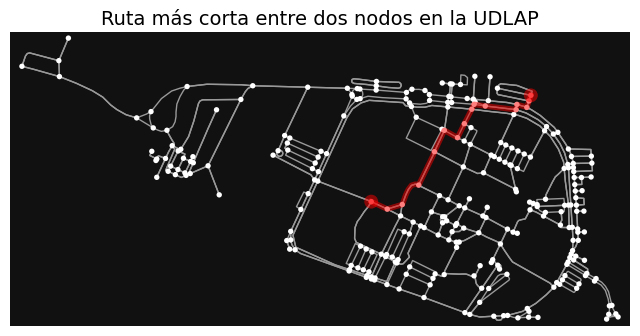

In [15]:
# Encontrar los nodos más cercanos a dos puntos específicos dentro del grafo de la UDLAP
orig = ox.distance.nearest_nodes(graph_place, X=-98.284968, Y=19.054463)  # Nodo de origen más cercano
dest = ox.distance.nearest_nodes(graph_place, X=-98.274968, Y=19.064463)  # Nodo de destino más cercano

# Calcular la ruta más corta entre los nodos encontrados utilizando la distancia como peso
route = ox.shortest_path(graph_place, orig, dest, weight='length')

# Graficar la ruta más corta sobre la red vial
fig, ax = ox.plot_graph_route(graph_place, route, show=False, close=False)

# Agregar un título descriptivo a la gráfica
ax.set_title("Ruta más corta entre dos nodos en la UDLAP", fontsize=14, color="black")
plt.show()

## Visualización

```ox.plot_graph(graph):``` Grafica una red de calles.

```ox.plot_footprints(buildings):``` Grafica edificios.

```ox.plot_shape(shape):``` Grafica una geometría (por ejemplo, un polígono).

```ox.plot_graph_route(graph, route):``` Grafica una ruta específica en la red.

```ox.plot_graph_routes(graph, routes): ```Grafica múltiples rutas en la red.


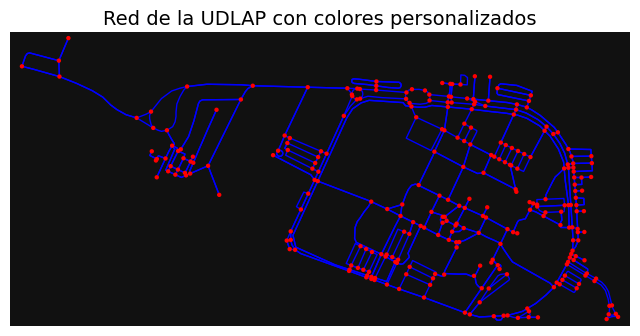

In [16]:
# Descargar la red de calles de la Universidad de las Américas Puebla
graph_place = ox.graph_from_place('Universidad de las Américas Puebla, Cholula, Puebla, México', network_type='all')

# Graficar la red vial con colores y tamaños personalizados
fig, ax = ox.plot_graph(
    graph_place,
    node_color='red',  # Color de los nodos en rojo
    edge_color='blue',  # Color de las aristas en azul
    node_size=10,  # Tamaño de los nodos
    edge_linewidth=1,  # Grosor de las aristas
    show=False,  # No mostrar automáticamente la figura
    close=False  # No cerrar la figura inmediatamente
)

# Agregar un título a la gráfica
ax.set_title("Red de la UDLAP con colores personalizados", fontsize=14, color="black")
plt.show()

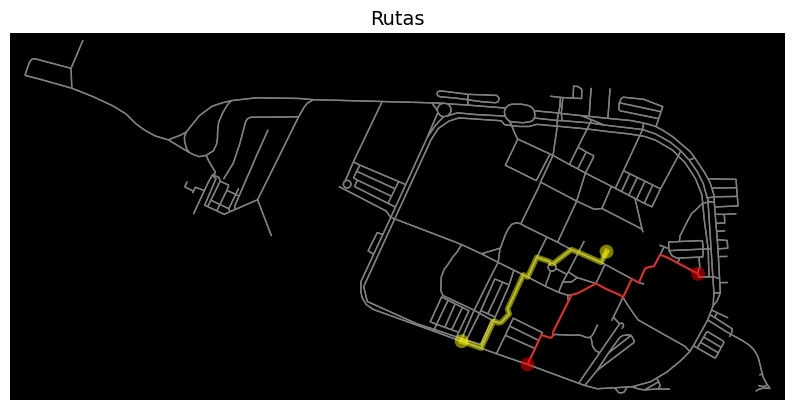

In [17]:
# Descargar el grafo de calles en la zona de la UDLAP
place_name = "Universidad de las Américas Puebla, Cholula, Puebla, México"
graph = ox.graph_from_place(place_name, network_type="walk")  # Red peatonal

# Definir coordenadas del punto de origen y destino para las dos rutas
orig_lat, orig_lon = 19.051946, -98.285089  # Entrada Gaos (origen, ruta 1)
dest_lat, dest_lon = 19.053889639058962, -98.28212519342718  # Escuela de Ingeniería (destino, ruta 1)

# Coordenadas para la segunda ruta
orig_lat_2, orig_lon_2 = 19.051300, -98.283500  # Origen (entrada UDLAP, ruta 2)
dest_lat_2, dest_lon_2 = 19.053500, -98.280500  # Destino (Biblioteca, ruta 2)

# Encontrar los nodos más cercanos a origen y destino para las rutas
orig_node = ox.distance.nearest_nodes(graph, orig_lon, orig_lat)
dest_node = ox.distance.nearest_nodes(graph, dest_lon, dest_lat)

# Encontrar los nodos más cercanos para la segunda ruta
orig_node_2 = ox.distance.nearest_nodes(graph, orig_lon_2, orig_lat_2)
dest_node_2 = ox.distance.nearest_nodes(graph, dest_lon_2, dest_lat_2)

# Calcular la primera ruta más corta (usando la distancia como peso)
route_1 = nx.shortest_path(graph, orig_node, dest_node, weight="length")

# Calcular la segunda ruta más corta (usando la distancia como peso)
route_2 = nx.shortest_path(graph, orig_node_2, dest_node_2, weight="length")

# Crear la figura y los ejes para el mapa
fig, ax = plt.subplots(figsize=(10, 10))  # Crear una figura de tamaño 10x10
ax.set_facecolor("black")  # Fondo negro
ax.set_title("Rutas", fontsize=14, color="black")# Agregar título
# Graficar la red vial sobre el mapa (en color gris claro) - sin mostrar el gráfico aún
ox.plot_graph(graph, ax=ax, node_size=0, edge_color="gray", bgcolor="black", show=False)

# Graficar las dos rutas usando plot_graph_routes() (mostrar en el gráfico sin sobrescribir)
routes = [route_1, route_2]  # Lista de rutas
route_colors = ['yellow', 'red']  # Colores diferentes para cada ruta
route_linewidths = [4, 2]  # Grosor de línea diferente para cada ruta

# Graficar las rutas sobre el mapa
ox.plot.plot_graph_routes(graph, routes, ax=ax, route_colors=route_colors, route_linewidths=route_linewidths, node_size=0)

# Mostrar la gráfica
plt.show()



## Exportación de datos

ox.save_graphml(graph, filepath): Guarda la red en formato GraphML.

ox.save_graph_shapefile(graph, filepath): Guarda la red en formato Shapefile.

ox.save_graph_geopackage(graph, filepath): Guarda la red en formato GeoPackage.

In [18]:
# Descargar red de calles
graph_place = ox.graph_from_place('Universidad de las Américas Puebla, Cholula, Puebla, México', network_type='all')

# Guardar la red en formato GraphML
ox.save_graphml(graph_place, filepath='red_udlap.graphml')

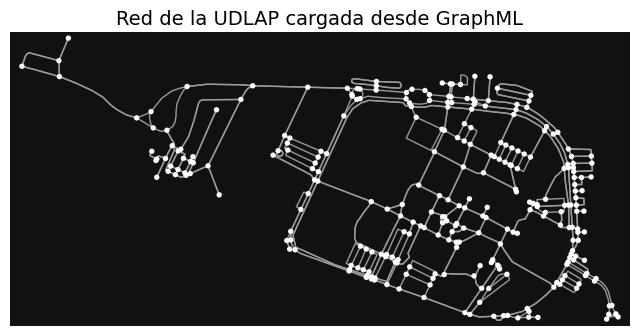

In [19]:
# Graficar la red cargada
fig, ax = ox.plot_graph(graph_place, show=False, close=False)
ax.set_title("Red de la UDLAP cargada desde GraphML", fontsize=14, color="black")
plt.show()

In [20]:
# Descargar el grafo de calles en la zona de la UDLAP
place_name = "Universidad de las Américas Puebla, Cholula, Puebla, México"
graph = ox.graph_from_place(place_name, network_type="walk")  # Red peatonal

# Especificar la ruta de archivo donde se guardará el GeoPackage en Google Colab
filepath = "/content/udlap_graph.gpkg"  # Ruta en Google Colab

# Guardar el grafo como un archivo GeoPackage
ox.save_graph_geopackage(graph, filepath)

print(f"Grafo guardado en: {filepath}")

Grafo guardado en: /content/udlap_graph.gpkg


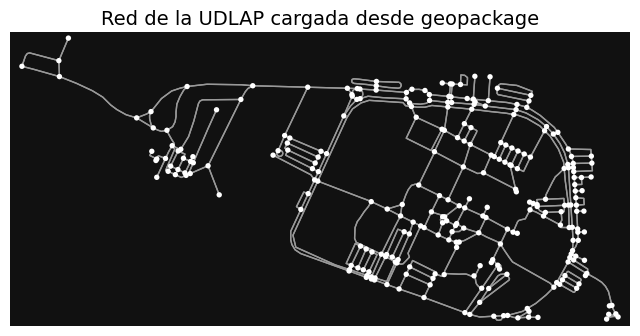

In [21]:
# Graficar el grafo cargado
fig, ax = ox.plot_graph(graph, show=False, close=False)
ax.set_title("Red de la UDLAP cargada desde geopackage", fontsize=14, color="black")
plt.show()

## Utilidades
```ox.geocode(query):``` Convierte una dirección o nombre de lugar en coordenadas (latitud, longitud).

```ox.distance.great_circle_vec(lat1, lng1, lat2, lng2):``` Calcula la distancia geodésica entre dos puntos.


(Otros métodos no mostrados en Python pero de interés)

```ox.utils_graph.get_route_edge_attributes(graph, route):``` Obtiene atributos de las aristas en una ruta.

In [22]:
# Geocodificar una dirección utilizando OpenStreetMap
location = ox.geocode('Universidad de las Américas Puebla, Cholula, Puebla, México')

# Imprimir las coordenadas obtenidas para la dirección geocodificada
print("Coordenadas de la UDLAP:", location)


Coordenadas de la UDLAP: (19.0544632, -98.28496803209754)


In [23]:
# Coordenadas de dos puntos geográficos (latitud, longitud)
point1 = (19.054463, -98.284968)  # Primer punto (lat, lon)
point2 = (19.064463, -98.274968)  # Segundo punto (lat, lon)

# Calcular la distancia geodésica (distancia en línea recta) entre los dos puntos utilizando la fórmula de gran círculo
distance = ox.distance.great_circle(point1[0], point1[1], point2[0], point2[1])

# Imprimir la distancia geodésica calculada en metros
print("Distancia geodésica:", distance, "m")


Distancia geodésica: 1530.040140297875 m


Para más información de esta librería, consulta la [Documentación de OSMNX](https://osmnx.readthedocs.io/en/stable/)